## Comparing sea temperature from Copernics assimilated model and marc model
 [Atlantic - European North West Shelf - Ocean Physics Analysis and Forecast from Copernicus Marine services](https://data.marine.copernicus.eu/product/NORTHWESTSHELF_ANALYSIS_FORECAST_PHY_004_013/services) 

In [2]:
import intake
import xarray as xr
import numpy as np
#clim=(10,25);clim=(9,15)

In [102]:
import hvplot.xarray
clim=(9,20)
xlim=(-9.31402439,-0.76219512)
ylim=(45.54662379, 51.28617363)
width=400
height=100

In [93]:
catalogue="/home/datawork-taos-s/intranet/kerchunk/ref-copernicus.yaml"
catalogue = "https://data-taos.ifremer.fr/kerchunk/ref-copernicus.yaml"
cat = intake.open_catalog(catalogue)
copernicus=cat.copernicus(year=year).to_dask()#.sel(time=time)
copernicus=copernicus.thetao.sel(depth='0')

In [94]:
catalogue = "https://data-taos.ifremer.fr/kerchunk/ref-marc.yaml"
cat = intake.open_catalog(catalogue)
marc=cat.marc(region='f1_e2500' , year=year).to_dask().rename({"latitude":"lat","longitude":"lon"})
marc['lon']=marc.lon.compute()
marc['lat']=marc.lat.compute()
marc=marc.TEMP.sel(level='0',method='nearest')

:Layout
   .DynamicMap.I  :DynamicMap   [time]
      :QuadMesh   [lon,lat]   (TEMP)
   .DynamicMap.II :DynamicMap   [time]
      :QuadMesh   [lon,lat]   (thetao)
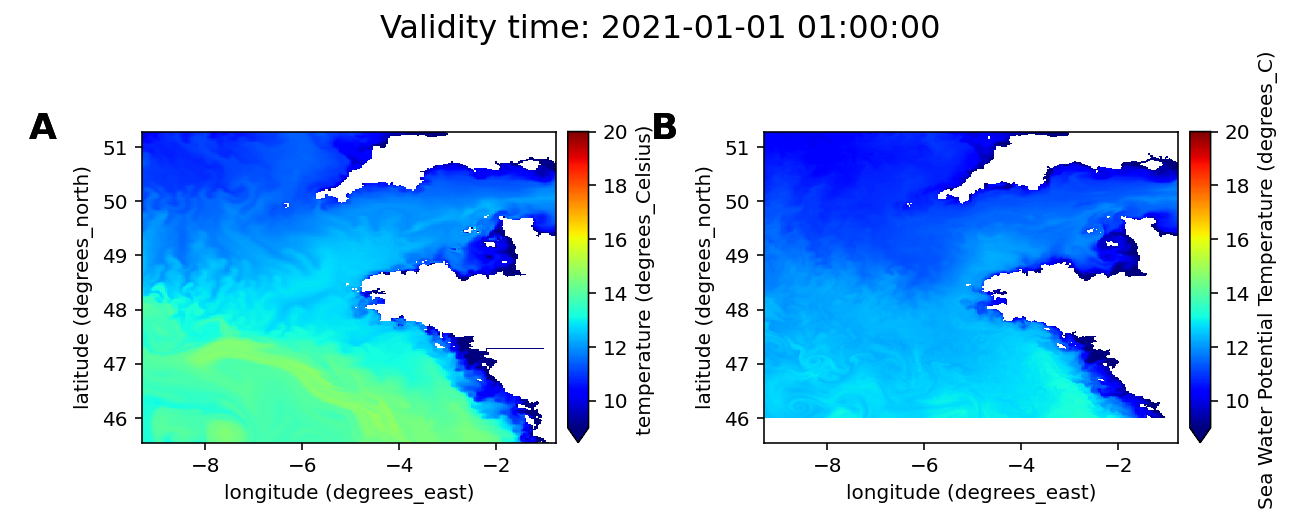

In [103]:
import hvplot as hv
hv.extension("matplotlib")
hv.output(widget_location='bottom')
marc['time']=copernicus['time']
marc.hvplot.quadmesh(    y='lat',x='lon',cmap='jet',xlim=xlim,ylim=ylim,width=width,clim=clim
)+copernicus.hvplot.quadmesh(    y='lat',x='lon',cmap='jet',xlim=xlim,ylim=ylim,width=width,clim=clim
)